# Housing Prices in King County

## Imports

In [1]:
import datacleaning as dc
import linregvis as lrv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.2f}".format
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

## The Data

The data being used is publicly available housing data from King County, Washington from 2014-2015.  Prior to any data analysis, the test data is split from the training data to prevent data leakage. The split is 80% training, 20% testing.  The dataset contains ~21,600 rows, with each row representing the sale of a house in King County.  The columns represent features of that house.

In [2]:
df = dc.test_split(
    dc.get_data('data/kc_house_data.csv')
)
X_train = dc.clean_it(df[0])
X_test = dc.clean_it(df[1])
y_train = df[2]
y_test = df[3]

## Exploratory Data Analysis

In [41]:
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,ratio_15,years_old,condition_2,condition_3,condition_4,condition_5
5052,6744700285,2015-03-11,4,3.50,3270,15160,1.00,0.00,8,1660,1997,nan,2790,15160,1.17,23,0,1,0,0
8658,3630010040,2014-05-23,3,2.00,1540,1827,2.00,0.00,8,1540,2005,0.00,1540,1827,1.00,15,0,1,0,0
16841,2881700231,2015-04-22,3,1.75,1440,11364,1.00,0.00,7,1440,1985,0.00,1950,9390,0.74,35,0,1,0,0
9439,2312400230,2014-09-24,3,2.25,1810,12000,2.00,0.00,7,1810,1992,0.00,1720,9916,1.05,28,0,1,0,0
21301,1732800199,2015-05-11,2,2.50,1680,977,3.00,0.00,9,1680,2009,0.00,1680,977,1.00,11,0,1,0,0


In [43]:
X_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,ratio_15,years_old,condition_2,condition_3,condition_4,condition_5
count,"17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","14,197.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00","17,277.00"
mean,"4,576,436,161.86",3.37,2.12,"2,085.54","15,233.44",1.49,0.01,7.66,"1,793.74","1,970.91",84.91,"1,988.33","12,957.74",1.06,49.09,0.01,0.65,0.26,0.08
std,"2,879,359,277.94",0.90,0.77,924.04,"41,780.09",0.54,0.08,1.18,834.27,29.45,402.83,690.02,"28,393.80",0.32,29.45,0.09,0.48,0.44,0.27
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,3.00,370.00,"1,900.00",0.00,399.00,651.00,0.27,5.00,0.00,0.00,0.00,0.00
25%,"2,115,510,330.00",3.00,1.75,"1,430.00","5,050.00",1.00,0.00,7.00,"1,200.00","1,951.00",0.00,"1,480.00","5,100.00",0.88,23.00,0.00,0.00,0.00,0.00
50%,"3,904,902,630.00",3.00,2.25,"1,920.00","7,610.00",1.50,0.00,7.00,"1,564.00","1,975.00",0.00,"1,840.00","7,620.00",1.00,45.00,0.00,1.00,0.00,0.00
75%,"7,308,900,445.00",4.00,2.50,"2,560.00","10,688.00",2.00,0.00,8.00,"2,220.00","1,997.00",0.00,"2,370.00","10,080.00",1.16,69.00,0.00,1.00,1.00,0.00
max,"9,900,000,190.00",11.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,13.00,"9,410.00","2,015.00","2,015.00","6,210.00","871,200.00",6.00,120.00,1.00,1.00,1.00,1.00


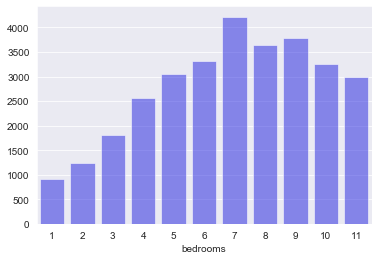

In [36]:
df = pd.concat([X_train, y_train], axis = 1)
bedrooms_grouped = df.groupby(df['bedrooms'])['sqft_living'].mean()
bedrooms_grouped.index
sns.barplot(x = bedrooms_grouped.index, y = bedrooms_grouped.values, color = 'b', alpha = .5);

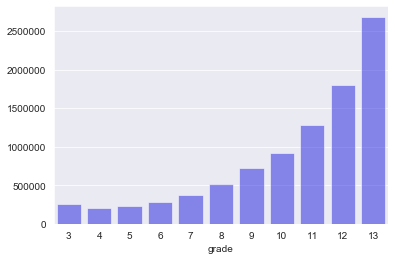

In [39]:
df = pd.concat([X_train, y_train], axis = 1)
g_grouped = df.groupby(df['grade'])['price'].median()
g_grouped
sns.barplot(x = g_grouped.index, y = g_grouped.values, color = 'b', alpha = .5);

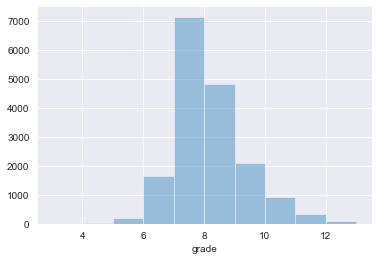

In [45]:
sns.distplot(df.grade, bins = 10, kde = False);

## Baseline Model

In [46]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.0

In [47]:
y_pred = dummy.predict(X_train)
from sklearn.metrics import mean_squared_error
dummy_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
dummy_rmse

372015.8723643869

## Model #1

In [8]:
formula = "price ~ sqft_living"
model_1 = lrv.run_lr(formula, X_train, y_train)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:30:59   Log-Likelihood:            -2.4032e+05
No. Observations:               17277   AIC:                         4.806e+05
Df Residuals:                   17275   BIC:                         4.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.57e+04   4993.714     -9.152      0.000   -5.55e+04   -3.59e+04
sqft_living   281.6056      2.189    128.634      0.000     277.315     285.897
==============================================================================
Omnibus:                    12287.594   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           502138.509
Skew:                           2.943   Prob(JB):                         0.00
Kurtosis:                      28.747   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualization

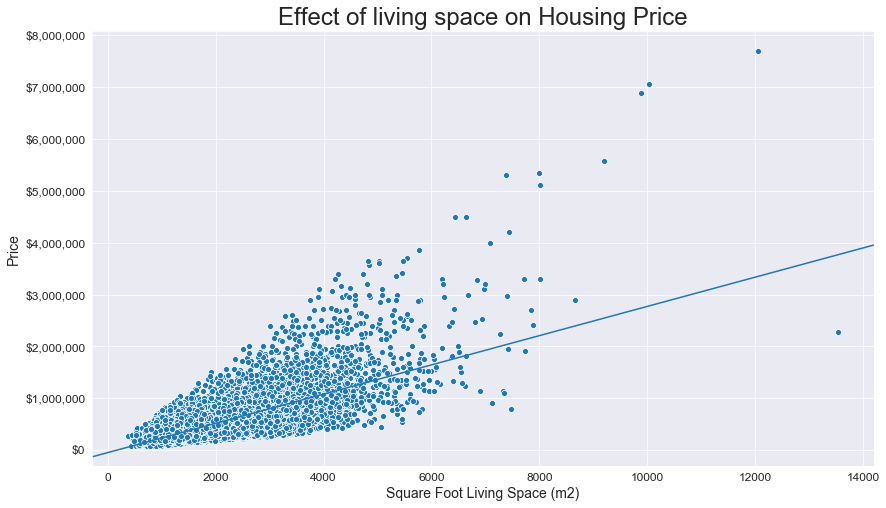

In [13]:
fig, ax = plt.subplots(figsize = (14,8))
ax = sns.scatterplot(X_train.sqft_living, y_train)
ax.set_xlabel('Square Foot Living Space (m2)', fontsize = 14)
ax.set_ylabel('Price', fontsize = 14)
ax.set_title('Effect of living space on Housing Price', fontsize = 24)
ax.tick_params(labelsize = 14)
lrv.dollar_ticks(ax)
abline_plot(model_results=model_1, ax = ax);
# fig.savefig('./images/filename', bbox_inches='tight')

## Model #2

In [ ]:
formula = "price ~ sqft_living + condition_2 + condition_3 + condition_4 + condition_5"
model_2 = lrv.run_lr(formula, X_train, y_train)
model_2.summary()

## Model #3

In [25]:
formula = "price ~ sqft_living + grade + waterfront + years_old + ratio_15"
model_3 = lrv.run_lr(formula, X_train, y_train)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     6029.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:43:00   Log-Likelihood:            -2.3740e+05
No. Observations:               17277   AIC:                         4.748e+05
Df Residuals:                   17271   BIC:                         4.749e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.764e+05   1.79e+04    -54.461      0.000   -1.01e+06   -9.41e+05
sqft_living   199.9340      3.476     57.525      0.000     193.121     206.747
grade        1.334e+05   2467.811     54.063      0.000    1.29e+05    1.38e+05
waterfront   8.105e+05   2.16e+04     37.590      0.000    7.68e+05    8.53e+05
years_old    3591.0536     65.162     55.109      0.000    3463.329    3718.778
ratio_15    -9.693e+04   6687.463    -14.495      0.000    -1.1e+05   -8.38e+04
==============================================================================
Omnibus:                    13352.225   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1010499.346
Skew:                           3.129   Prob(JB):                         0.00
Kurtosis:                      39.940   Cond. No.                     2.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model #4

In [26]:
formula = "price ~ bathrooms + grade + waterfront + years_old + ratio_15"
model_4 = lrv.run_lr(formula, X_train, y_train)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     5060.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:44:16   Log-Likelihood:            -2.3833e+05
No. Observations:               17277   AIC:                         4.767e+05
Df Residuals:                   17271   BIC:                         4.767e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.512e+06   1.54e+04    -97.937      0.000   -1.54e+06   -1.48e+06
bathrooms   1.252e+05   3603.198     34.747      0.000    1.18e+05    1.32e+05
grade       1.992e+05   2087.093     95.456      0.000    1.95e+05    2.03e+05
waterfront  8.617e+05   2.27e+04     37.924      0.000    8.17e+05    9.06e+05
years_old   4550.2752     73.395     61.997      0.000    4406.414    4694.136
ratio_15    3.194e+04   6355.527      5.026      0.000    1.95e+04    4.44e+04
==============================================================================
Omnibus:                    15119.423   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1649749.027
Skew:                           3.714   Prob(JB):                         0.00
Kurtosis:                      50.292   Cond. No.                         729.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""